In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

In [2]:
#케라스가 내 모델에 맞추기 위해 사용할 수 있는 one-hot 벡터 배열을 one-hot 벡터 배열로 바꾸기
from keras.utils.np_utils import to_categorical
#입력이미지의 shape 이 (batch_size, width, height, n_channels)로 넣어줘야함
X_train = (train[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)

#레이블 준비하기
y_train = to_categorical(train['digit'].values)
print(X_train[0].shape)
print(len(y_train))

Using TensorFlow backend.
C:\Users\woojung\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\woojung\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\woojung\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\woojung\anaconda3\lib\site-packages\tensorflow\python\framework\d

(28, 28, 1)
2048


C:\Users\woojung\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\woojung\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\woojung\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\woojung\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 아마 성능 향상의 가장 큰 요인, 데이터 증강
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [49]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,Activation
)
from keras.optimizers import Adam
#from keras.layers import LeakyReLU


def deep_cnn_advanced():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = keras.optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model
model = deep_cnn_advanced()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_56 (Batc (None, 28, 28, 50)        200       
_________________________________________________________________
activation_54 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_57 (Batc (None, 28, 28, 50)        200       
_________________________________________________________________
activation_55 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 50)      

In [50]:
# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
from tensorflow import keras
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [52]:
#model.summary()

In [53]:
# 좀 더 빨리 하기 위함
from tensorflow.keras.callbacks import LearningRateScheduler
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [54]:
from sklearn.model_selection import train_test_split
epochs = 45
# Train-Test를 9:1로 분리
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_train, y_train, test_size = 0.1)

#fit 메서드로 트레이닝 시작
hist = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=0
)
print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(hist.history['acc']):.5f}, " +
    f"Validation accuracy={max(hist.history['val_acc']):.5f}"
)

CNN: Epochs=45, Train accuracy=0.63225, Validation accuracy=0.73659


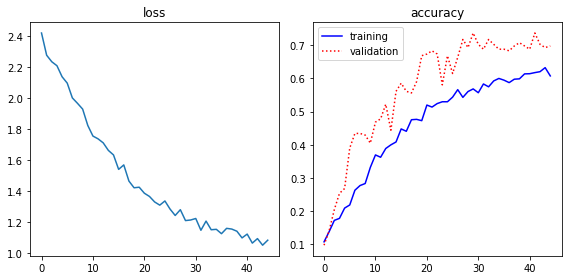

In [55]:
#성능 visualize
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# Parameter 및 모델 구조 저장
model.save_weights(f'params.h5')
    
model_json = model.to_json()
with open(f"model_NewCNN_batchnormalize.json", "w") as json_file : 
    json_file.write(model_json)

In [57]:
# 예측 진행
X_test = (test[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)
#results = model.predict(X_test)
submission['digit']=np.argmax(model.predict(X_test),axis =1)

In [58]:
#submission.digit = results
submission.to_csv('model_NewCNN_batchnormalize.csv', index=False)

In [39]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,Activation
)
from keras.optimizers import Adam
def deep_cnn_advanced_nin():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = keras.optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = deep_cnn_advanced_nin()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_44 (Batc (None, 28, 28, 50)        200       
_________________________________________________________________
activation_42 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 28, 28, 25)        1275      
_________________________________________________________________
batch_normalization_45 (Batc (None, 28, 28, 25)        100       
_________________________________________________________________
activation_43 (Activation)   (None, 28, 28, 25)      

In [40]:
from sklearn.model_selection import train_test_split
epochs = 45
# Train-Test를 9:1로 분리
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_train, y_train, test_size = 0.1)

#fit 메서드로 트레이닝 시작
hist = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=0
)
print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(hist.history['acc']):.5f}, " +
    f"Validation accuracy={max(hist.history['val_acc']):.5f}"
)

CNN: Epochs=45, Train accuracy=0.67477, Validation accuracy=0.74146


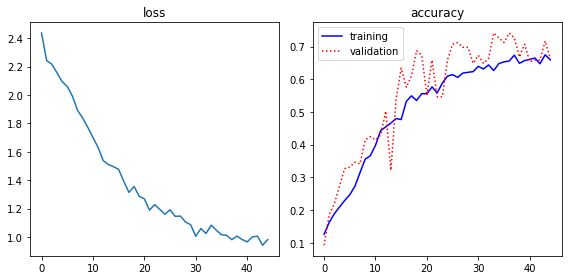

In [41]:
#성능 visualize
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()